#### Problem Statement: To identify the varibables which has direct impact on hospitalization charges and are significant in predicting for any machine learning model

#### Importing all the required libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

In [73]:
path = os.getcwd() + '\Data\Hospital Data.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


#### Basic Exploration

In [74]:
df.shape

(1338, 8)

In [75]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [76]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [77]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


#### Data Visualization - Univariate analysis

In [79]:
df['hospitalization charges']

0       42212
1        4314
2       11124
3       54961
4        9667
        ...  
1333    26501
1334     5515
1335     4075
1336     5020
1337    72853
Name: hospitalization charges, Length: 1338, dtype: int64

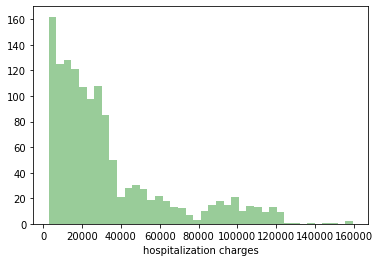

In [80]:
sns.distplot(df['hospitalization charges'],bins=40,kde=False,color='Green')
plt.show()

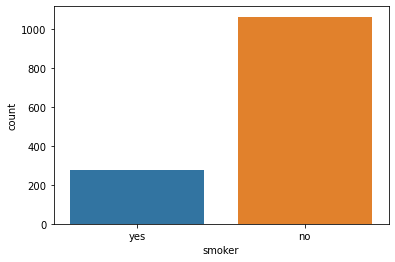

In [81]:
#Barchart to display the smoker versus non smoker
sns.countplot(df['smoker'])
plt.show()

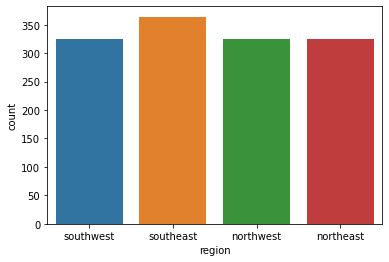

In [82]:
#Count chart to display which region has most hospital entry
sns.countplot(df['region'])
plt.show()

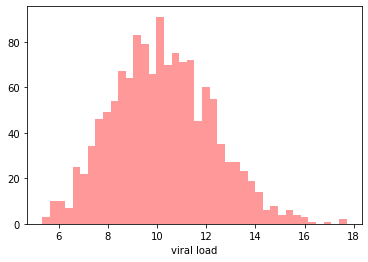

In [83]:
#distribution of viral load
sns.distplot(df['viral load'],bins=40,kde=False,color='red')
plt.show()

#### Data Visualization - Multivariate analysis

#### Understanding the realation between Sex and Hospitalization charges

In [84]:
df[["sex","hospitalization charges"]].groupby("sex").sum().reset_index()

,sex,hospitalization charges
0,female,20802652
1,male,23586914


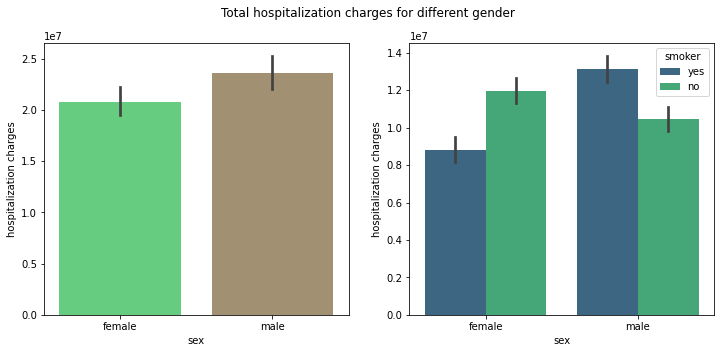

In [85]:
fig,ax = plt.subplots(1,2, figsize=(12,5))
plt.suptitle("Total hospitalization charges for different gender")
sns.barplot(x="sex",y="hospitalization charges",data=df,estimator=np.sum,palette="terrain",ax=ax[0])
sns.barplot(x="sex",y="hospitalization charges",hue="smoker",data=df,estimator=np.sum,palette="viridis",ax=ax[1])
plt.show()

In [86]:
# Male user tend to have more hospitilization charges in general
# Male users who smoke have more hospitilization charges

In [87]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


#### Understanding the realation between Region and Hospitalization charges

In [88]:
df[["region","hospitalization charges"]].groupby("region").sum().reset_index()

,region,hospitalization charges
0,northeast,10859173
1,northwest,10089281
2,southeast,13409229
3,southwest,10031883


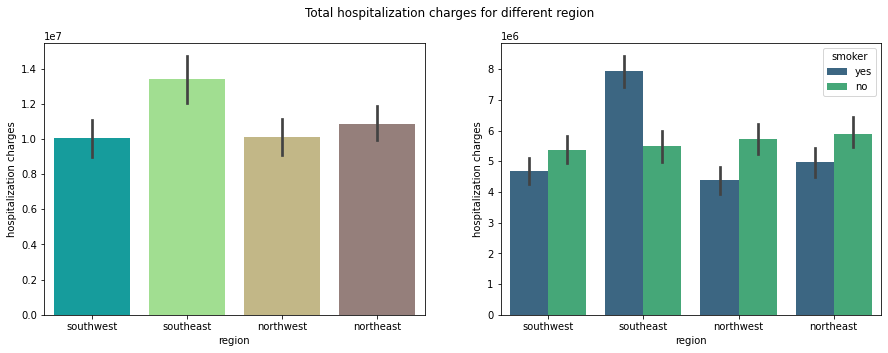

In [89]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle("Total hospitalization charges for different region")
sns.barplot(x="region",y="hospitalization charges",data=df,estimator=np.sum,palette="terrain",ax=ax[0])
sns.barplot(x="region",y="hospitalization charges",hue="smoker",data=df,estimator=np.sum,palette="viridis",ax=ax[1])
plt.show()

In [90]:
# We have southeast region with most amount of hospitilization charges

In [91]:
smoker_by_region = df[['region','smoker','hospitalization charges']].groupby(by=['region','smoker']).sum().reset_index()
total = df[['region','smoker','hospitalization charges']].groupby(by=['region']).sum().reset_index()
smoker_perc = pd.merge(smoker_by_region,total,how='inner', on = 'region')
smoker_perc['smoking_perc'] = smoker_perc['hospitalization charges_x']/smoker_perc['hospitalization charges_y'] * 100
smoker_perc_yes = smoker_perc[smoker_perc['smoker'] == 'yes'][['region','smoking_perc']]
smoker_perc_no = smoker_perc[smoker_perc['smoker'] == 'no'][['region','smoking_perc']]

In [92]:
#59% of the hospitalization bills are coming from southeast with people smoking

smoker_perc_yes

,region,smoking_perc
1,northeast,45.770677
3,northwest,43.390971
5,southeast,59.117776
7,southwest,46.641443


In [93]:
#56% of the hospitalization bills are coming from northwest with people non-smoking

smoker_perc_no

,region,smoking_perc
0,northeast,54.229323
2,northwest,56.609029
4,southeast,40.882224
6,southwest,53.358557


### Understanding the realation between Severiatity level and Hospitalization charges

In [94]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [95]:
df['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

In [96]:
#There are a total of six level of severity  

In [97]:
df[["severity level","hospitalization charges"]].groupby("severity level").sum().reset_index()

,severity level,hospitalization charges
0,0,17745176
1,1,10312251
2,2,9044138
3,3,6026964
4,4,865667
5,5,395370


In [98]:
#Assuming severity increases with level

#Clearly people with sevirity zero spends more on hospital bills

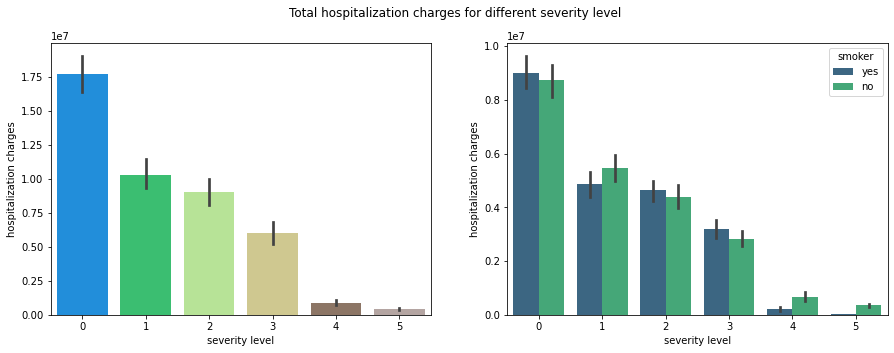

In [99]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle("Total hospitalization charges for different severity level")
sns.barplot(x="severity level",y="hospitalization charges",data=df,estimator=np.sum,palette="terrain",ax=ax[0])
sns.barplot(x="severity level",y="hospitalization charges",hue="smoker",data=df,estimator=np.sum,palette="viridis",ax=ax[1])
plt.show()

In [100]:
# We can observe a clear trend where peoples spending changes with incresing severity. It could be beacause of the fact that we have more patients in severity 0 as comaped to 5.

## Missing Values and Outlier detections

In [101]:
df.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [102]:
#There are no null values in the dataset

In [103]:
#Outlier for hospital bills

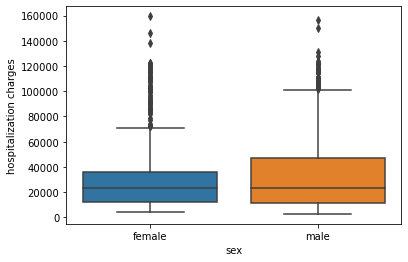

In [104]:
sns.boxplot(x = 'sex', y = 'hospitalization charges', data = df)
plt.show()

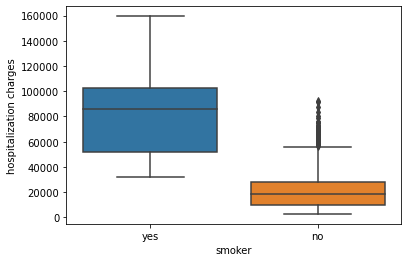

In [105]:
sns.boxplot(x = 'smoker', y = 'hospitalization charges', data = df)
plt.show()

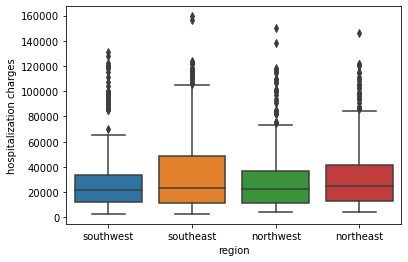

In [106]:
sns.boxplot(x = 'region', y = 'hospitalization charges', data = df)
plt.show()

#### In this case we can see a lot of outlier and needs to be remove in this case for the sake of simplicity. IQRis the method we will be using

In [107]:
Q1 = df['hospitalization charges'].quantile(0.25)
Q3 = df['hospitalization charges'].quantile(0.75)

IQR = Q3 - Q1

df_v1 = df[(df['hospitalization charges'] > (Q1 - 1.5*IQR)) & (df['hospitalization charges'] < (Q3 + 1.5*IQR))]

In [108]:
print('DataFrame shape before the removal of outliers: {}'.format(df.shape))
print('DataFrame shape after the removal of outliers: {}'.format(df_v1.shape))


DataFrame shape before the removal of outliers: (1338, 7)
DataFrame shape after the removal of outliers: (1199, 7)


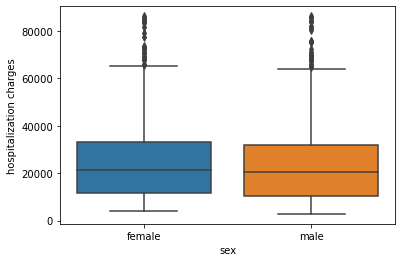

In [109]:
sns.boxplot(x = 'sex', y = 'hospitalization charges', data = df_v1)
plt.show()

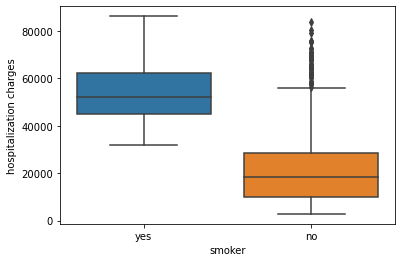

In [110]:
sns.boxplot(x = 'smoker', y = 'hospitalization charges', data = df_v1)
plt.show()

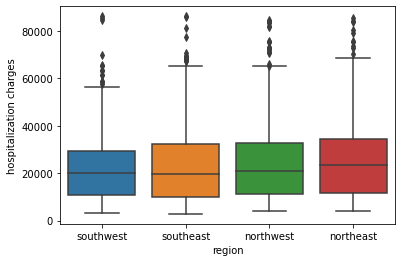

In [111]:
sns.boxplot(x = 'region', y = 'hospitalization charges', data = df_v1)
plt.show()

#### We still have potential outliers which could be a subject to discussion. But for the sake of simplicity we going to continue with df_v1

## Hypothesis Testing

#### 1. Hospitalization charges of people who do smoking are greater than those who don't? 

In [112]:
df_v1.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [113]:
df_v1['smoker'].value_counts()

no     1061
yes     138
Name: smoker, dtype: int64

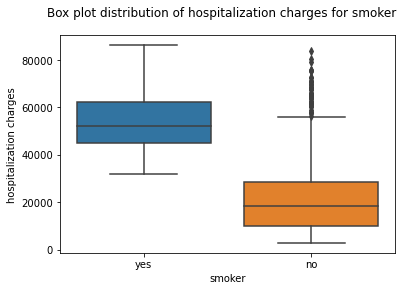

In [114]:
plt.suptitle("Box plot distribution of hospitalization charges for smoker")
sns.boxplot(x = 'smoker', y = 'hospitalization charges', data = df_v1)
plt.show()

In [115]:
print('Sample Standard Deviation')
df_v1.groupby('smoker')['hospitalization charges'].std()

Sample Standard Deviation


smoker
no     14541.903769
yes    13792.707698
Name: hospitalization charges, dtype: float64

In [116]:
print('Sample Mean')
df_v1.groupby('smoker')['hospitalization charges'].mean()

Sample Mean


smoker
no     20889.284637
yes    55035.586957
Name: hospitalization charges, dtype: float64

- Defining the Null and Alternate Hypothesis
- Null Hypothesis: The hospital charges of smokers is equal to that of the non-smokers.
- Alternate Hypothesis: The hospital charges of smokers is greater than that of the non-smokers.

In [118]:
smoker = df_v1[df_v1['smoker']=='yes']['hospitalization charges'].sample(138)
non_smoker = df_v1[df_v1['smoker']=='no']['hospitalization charges'].sample(138)

In [119]:
print('The sample standard deviation of the hospital charges for smokers is:',round(smoker.std(),2))
print('The sample standard deviation of the hospital charges for non-smokers is:',round(non_smoker.std(),2))

The sample standard deviation of the hospital charges for smokers is: 13792.71
The sample standard deviation of the hospital charges for non-smokers is: 13433.64


In [120]:
#Calculating the p-value

# import the required function
from scipy.stats import ttest_ind

# find the p-value
test_stat,p_value=ttest_ind(smoker,non_smoker,equal_var=False,alternative='greater')

print('The test_stat is',test_stat)
print('The p-value is',p_value)

The test_stat is 22.071918005178546
The p-value is 5.039856274693859e-63


In [121]:
#0.05 is the significance level
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the Null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the Null hypothesis')

As the p-value 5.039856274693859e-63 is less than the level of significance, we reject the Null hypothesis


#### 2. Viral load of females is different from that of males

In [122]:
df_v1.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [123]:
df_v1['sex'].value_counts()

female    612
male      587
Name: sex, dtype: int64

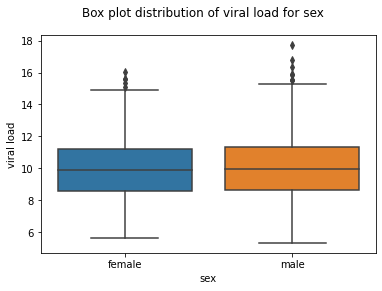

In [124]:
plt.suptitle("Box plot distribution of viral load for sex")
sns.boxplot(x = 'sex', y = 'viral load', data = df_v1)
plt.show()

In [125]:
print('Sample Standard Deviation')
df_v1.groupby('sex')['viral load'].std()

Sample Standard Deviation


sex
female    1.981809
male      2.026193
Name: viral load, dtype: float64

In [126]:
print('Sample Mean')
df_v1.groupby('sex')['viral load'].mean()

Sample Mean


sex
female     9.978186
male      10.087700
Name: viral load, dtype: float64

- Defining the Null and Alternate Hypothesis
- Null Hypothesis: The viral load of female is not equal to that of the male.
- Alternate Hypothesis: The viral load of female is equal to that of the male.

In [128]:
vl_female = df_v1[df_v1['sex']=='female']['viral load'].sample(587)
vl_male = df_v1[df_v1['sex']=='male']['viral load'].sample(587)

In [129]:
print('The sample standard deviation of the viral load for female is:',round(vl_female.std(),2))
print('The sample standard deviation of the viral load for male is:',round(vl_male.std(),2))

The sample standard deviation of the viral load for female is: 2.0
The sample standard deviation of the viral load for male is: 2.03


In [130]:
# find the p-value
test_stat,p_value=ttest_ind(vl_female,vl_male,equal_var=True)

print('The test_stat is',test_stat)
print('The p-value is',p_value)

The test_stat is -0.6960034468709482
The p-value is 0.4865646651544774


In [131]:
#0.05 is the significance level
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the Null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the Null hypothesis')

As the p-value 0.4865646651544774 is greater than the level of significance, we accept the Null hypothesis


#### 3. Is the proportion of smoking significantly different across different regions?

#### Statistical test required for this question is Chi-square as we are trying to understand the relation between two categoral variables

- Defining the Null and Alternate Hypothesis
- Null Hypothesis: The proporton of smoking is different across different regions.
- Alternate Hypothesis: The proporton of smoking is not different across different regions.

In [133]:
from scipy.stats import chi2_contingency

chisqt = pd.crosstab(df_v1['smoker'],df_v1['region'],margins=True)
print(chisqt)

region  northeast  northwest  southeast  southwest   All
smoker                                                  
no            257        267        272        265  1061
yes            39         38         35         26   138
All           296        305        307        291  1199


In [134]:
value =np.array([chisqt.iloc[0][0:5].values,chisqt.iloc[1][0:5].values])
stat_value,p_value,dof=chi2_contingency(value)[0:3]
print(p_value)

0.5620912428289834


In [135]:
#0.05 is the significance level
# print the conclusion based on p-value

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the Null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the Null hypothesis')

As the p-value 0.5620912428289834 is greater than the level of significance, we accept the Null hypothesis


#### 4. Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?

#### Since we are trying to comapre more than two comparable values we need to use ONE WAY ANOVA

In [136]:
df_v1.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


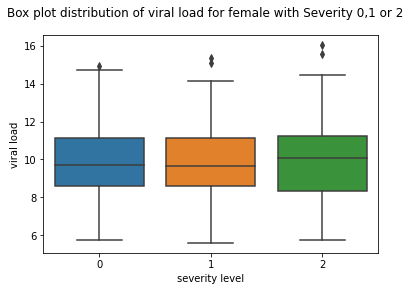

In [137]:
plt.suptitle("Box plot distribution of viral load for female with Severity 0,1 or 2")
sns.boxplot(x = 'severity level', y = 'viral load', data = df_v1[(df_v1['sex'] == 'female') & (df_v1['severity level'].isin([0,1,2]))])
plt.show()

In [138]:
df_v1[(df_v1['sex'] == 'female') & (df_v1['severity level'].isin([0,1,2]))]['severity level'].value_counts()

0    269
1    147
2    107
Name: severity level, dtype: int64

In [139]:
s0 = df_v1[(df_v1['sex'] == 'female') & (df_v1['severity level'].isin([0]))]['viral load'].sample(107)
s1 = df_v1[(df_v1['sex'] == 'female') & (df_v1['severity level'].isin([1]))]['viral load'].sample(107)
s2 = df_v1[(df_v1['sex'] == 'female') & (df_v1['severity level'].isin([2]))]['viral load'].sample(107)

In [140]:
print(f'The mean value of female viral load with Severity 0 is {round(s0.mean(),2)}')
print(f'The mean value of female viral load with Severity 1 is {round(s1.mean(),2)}')
print(f'The mean value of female viral load with Severity 2 is {round(s2.mean(),2)}')

The mean value of female viral load with Severity 0 is 10.13
The mean value of female viral load with Severity 1 is 9.88
The mean value of female viral load with Severity 2 is 10.0


- Defining the Null and Alternate Hypothesis
- Null Hypothesis: The mean viral load in different severity are equal
- Alternate Hypothesis: The mean viral load in different severity are not equal.

In [142]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(s0,s1,s2)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.6729285076504035


In [143]:
#0.05 is the significance level
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the Null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accept the Null hypothesis')

As the p-value 0.6729285076504035 is greater than the level of significance, we accept the Null hypothesis


In [145]:
#Since the p-value is greater than 5% significance level, we can reject the Alternate Hypothesis.
#Hence we can conclude that the mean viral load in different severity for females are equal.

##### Insights

1.  Based on this data, we have more number of patients who are non-smoker to be admitted in hospitals.
2.  We have more patients record coming in from southeast region
3. Male patients have more hospitalization charges in general
4. Male users who smoke have more hospitalization charges
5. Southeast region have more patients as well as high hospitalization charges
6. 59% of the hospitalization bills are coming from southeast with people smoking 
7. 56% of the hospitalization bills are coming from northwest with people non-smoking
8. We have higher patient counts for severity zero.

#### Recommendations

1. Since hospital charges of smokers are normality higher, Apollo could roll out a survey to understand which region has more smokers so that they can open a new branch there.
2. Apollo could focus on gender specific treatment as the viral load and severity of patients do vary with gender.

##### Feedback

1. Since we have verified viral load in males and females is the same,so treatment of viral cure can be used interchangeably without any gender bais.
2. As the age increases,hospitalisation charges increase.Less expensive Treatment Methods can be formalised for senior aged people to attract more number of patients.
3. We have found out that smoking tends to increase hospitalisation charges of the patient.Different set of treatment procedures can be devised for patients having smoking history vs non smokers.for quick response time to smoker category as well.
4. Since smoking is independent of region, hospitals in all regions should be able to tackle the smoking history patients.
5. Since viral load in women is same across severity level of 0,1,2. Same kind of treatment can be tried on womens with severity level of 0,1,2.